In [1]:
%load_ext autoreload

### Finding new Rfam families only

In [2]:
%autoreload
from rna2d.utils import Rfam

rfam142 = "../external-files/rfam-14.2/Rfam.pdb"
rfam148 = "../external-files/rfam-14.8/Rfam.pdb"

rfam = Rfam()
rfam2_mapping = rfam.get_pdb_family_mapping(rfam142)
rfam8_mapping = rfam.get_pdb_family_mapping(rfam148)
print(len(rfam2_mapping), len(rfam8_mapping))

5736 7659


In [3]:
print(sorted(list(rfam2_mapping.keys()))[:10])
print(sorted(list(rfam8_mapping.keys()))[:10])

['1ASY_R', '1ASY_S', '1ASZ_R', '1ASZ_S', '1B23_R', '1C04_E', '1C0A_B', '1C2W_B', '1C2X_C', '1EFW_C']
['1ASY_R', '1ASY_S', '1ASZ_R', '1ASZ_S', '1B23_R', '1C04_E', '1C0A_B', '1C2W_B', '1C2X_C', '1EFW_C']


In [4]:
new_mapping = rfam.get_new_keys_only(rfam2_mapping, rfam8_mapping)
print(len(new_mapping))

1977


### Remove SPOT-RNA training examples

In [5]:
import os
train_pdbs = "../external-files/PDB_dataset/TR1_sequences/"
def get_pdb_ids(path):
    pdbs = os.listdir(path)
    pdbs = [p.replace("-", "_") for p in pdbs]
    pdbs = [f'{p[:4].upper()}{p[4:]}' for p in pdbs]
    pdbs = [f'{p.split("_")[0]}_{p.split("_")[2]}' for p in pdbs]
    return pdbs

trpdbs = get_pdb_ids(train_pdbs)

nm = set(new_mapping.keys())
tp = set(trpdbs)
diff = nm.intersection(tp)
print(f'Common: {len(diff)}')

new_mapping = rfam.filter_out_list(trpdbs, new_mapping)
print(len(new_mapping))
print(sorted(trpdbs)[:5])

Common: 1
1976
['1C0A_B', '1DDY_A', '1DK1_B', '1DUL_B', '1FFK_9']


In [6]:
fams = [new_mapping[p] for p in new_mapping]


In [7]:

from collections import Counter
import matplotlib.pyplot as plt

c = Counter(fams)
vals = list(c.values())
keys = list(c.keys())
vk = sorted(zip(keys, vals), key=lambda x : x[1], reverse=True)
keys = [x[0] for x in vk]
vals = [x[1] for x in vk]


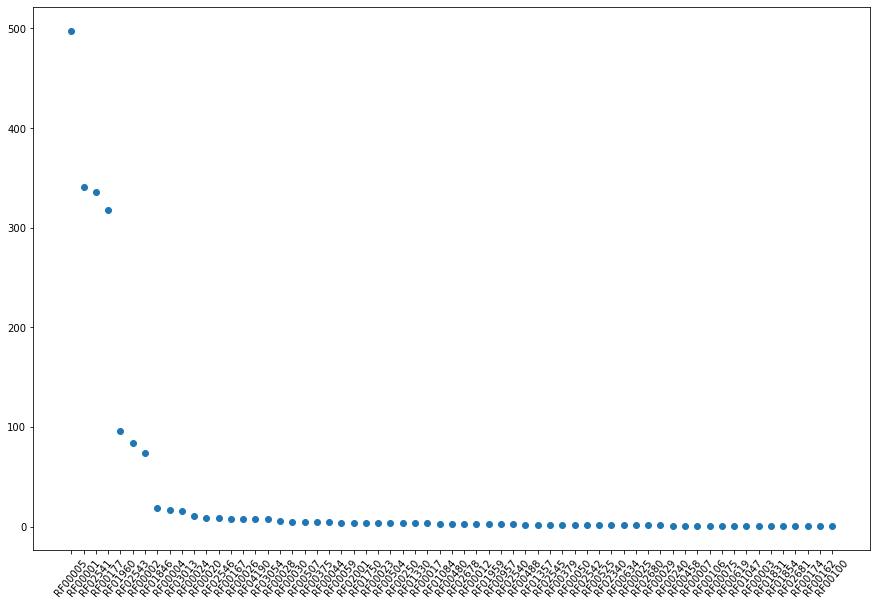

In [8]:
plt.figure(figsize=(15,10))
plt.scatter(keys, vals)
_ = plt.xticks(rotation=50)

In [15]:
from rna2d.pipelines import Pipeline
p = Pipeline("/data/2d-rna/validation-noncanon-non0/results.rpt")
methods, indeces = p.run_for_all()
pdb_repres = [f'{p.split("_")[0]}_{p.split("_")[2]}' for p in indeces['spot-rna']]

In [16]:
import pandas as pd
from rna2d.utils import get_names
tool = 'spot-rna'
converted_indeces = [f'{p.split("_")[0]}_{p.split("_")[2]}' for p in indeces[tool]]
common_ind = set(converted_indeces)
common_ind = list(common_ind.intersection(set(new_mapping.keys())))
print(f'Common ids: {len(common_ind)}')
res = {}
conv_ind = {}
for k in get_names():
    converted_indeces = [f'{p.split("_")[0]}_{p.split("_")[2]}' for p in indeces[k]]
    df = pd.DataFrame(methods[k], columns=[
                  'PPV', 'TPR', 'F1', 'INF'], index=converted_indeces)
    conv_ind[k]=converted_indeces
    res[k] =  df.loc[common_ind]

Common ids: 886


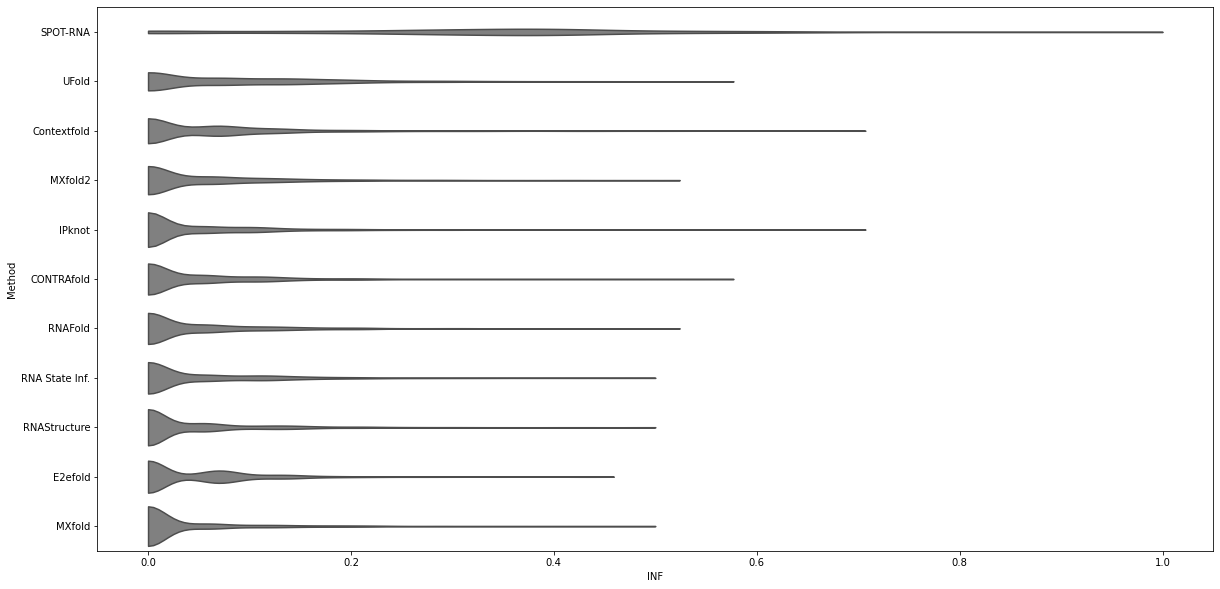

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns
from rna2d.utils import get_sns_data, get_means_stds, get_DataFrames

%autoreload
means, stds, dfs = get_means_stds(res, conv_ind)
dfmeans, dfstds = get_DataFrames(means, stds, name='nwc')

d = get_sns_data(res, dfmeans, get_names())

fig, axs = plt.subplots(1, figsize=(20, 10))
ax = sns.violinplot(x='INF', y='Method', inner=None, color='grey', data=d, ax=axs, cut=0)

In [18]:
dfmeans

,PPV,TPR,F1,INF
spot-rna,0.27,0.38,0.32,0.32
ufold,0.05,0.12,0.07,0.07
contextFold,0.03,0.08,0.05,0.05
mxfold2,0.03,0.06,0.04,0.04
ipknot,0.03,0.05,0.03,0.04
contrafold,0.03,0.05,0.04,0.04
rnafold,0.03,0.05,0.04,0.04
rna-state-inf,0.03,0.06,0.04,0.04
rna-structure,0.03,0.05,0.03,0.04
e2efold,0.03,0.07,0.04,0.04
